# Iris dataset clustering with Scykit


Install scikit learn python module


In [2]:
!pip install scikit-learn

## Import common packages

In [345]:
import matplotlib.pyplot as plt

## Import dataset

In [346]:
from sklearn.datasets import load_iris

iris = load_iris()

data = iris.data
class_names = iris.target_names
true_classification = iris.target
column_names = iris.feature_names

## Preprocess data

In [347]:
#TODO

## Define util functions

In [348]:
def plot_classification(*classification, plot_name):
    nrows, ncols = 3, 2
    fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 12))
    plt.suptitle(plot_name)
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])

    id = 0
    for i in range(len(column_names)):
        for j in range(i, len(column_names)):
            if(i != j):
                row = int(id/ncols)
                column = id % ncols
                axs[row][column].set_xlabel(column_names[i])
                axs[row][column].set_ylabel(column_names[j])
                axs[row][column].scatter(data[:, i], data[:, j], c=classification)
                id = id+1
    plt.show()

## Cluster and plot clustered data

#### KMeans

In [349]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, init="random", n_init="auto")

kmeans_classification = kmeans.fit_predict(data)

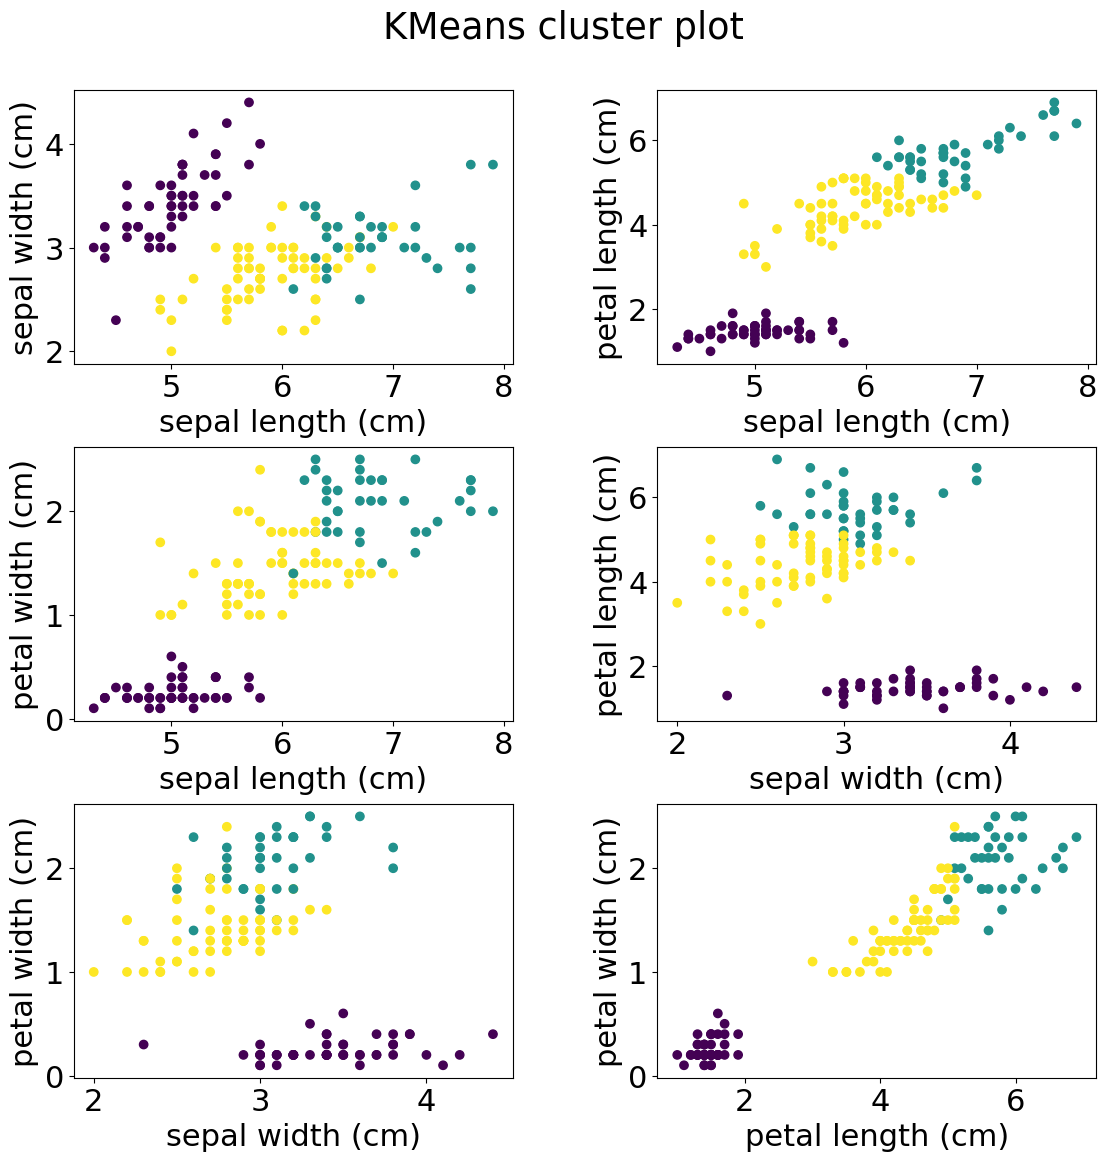

In [350]:
plot_classification(kmeans_classification, plot_name = "KMeans cluster plot")

#### Affinity Propagation

In [351]:
from sklearn.cluster import AffinityPropagation

affinityPropagation = AffinityPropagation()

affinity_propagation_classification = affinityPropagation.fit_predict(data)

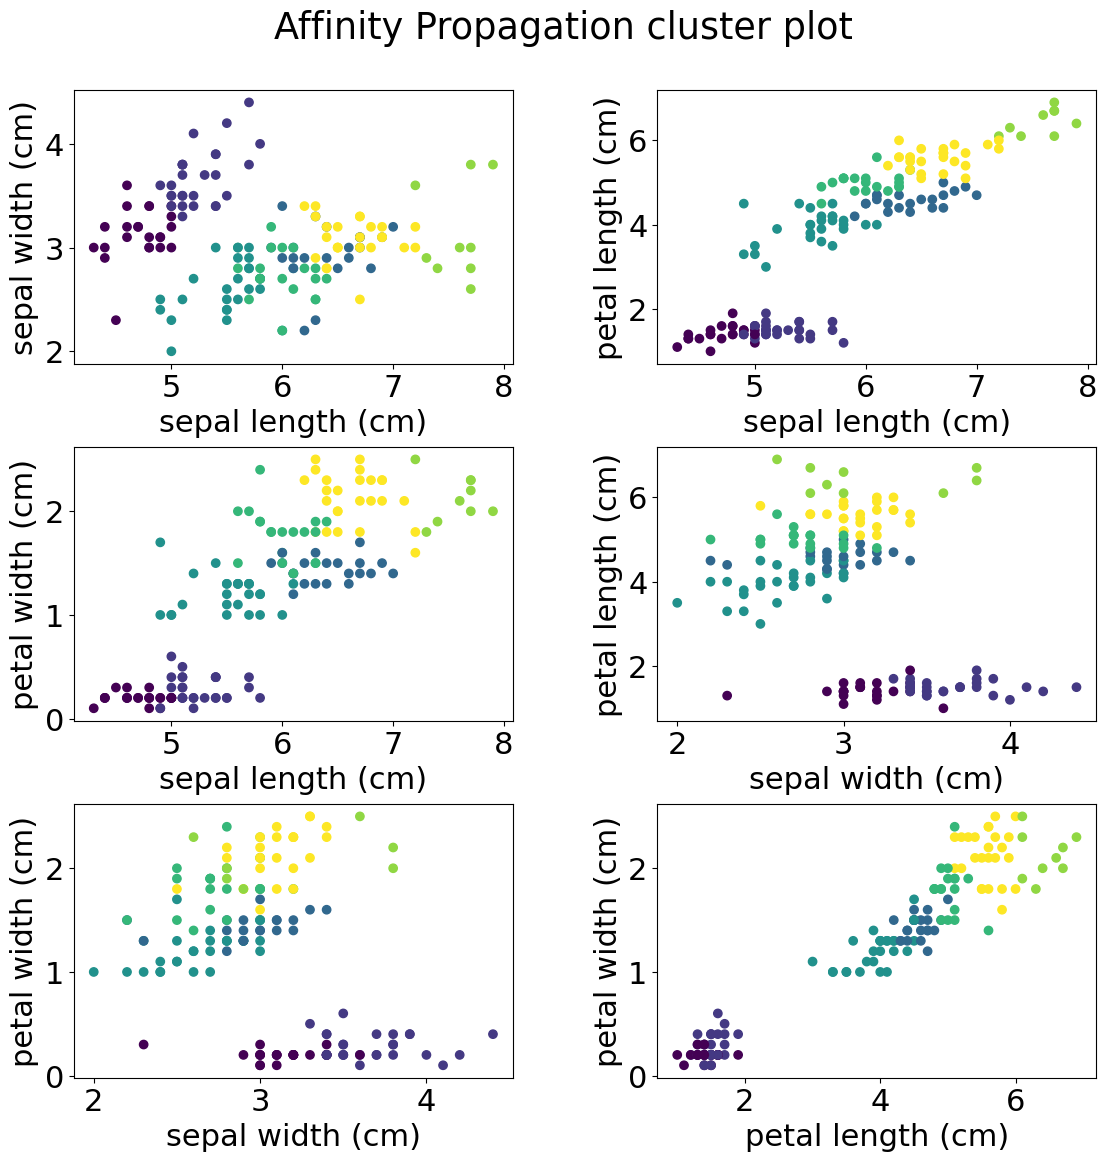

In [352]:
plot_classification(affinity_propagation_classification, plot_name = "Affinity Propagation cluster plot")

#### 

#### Mean Shift

In [353]:
from sklearn.cluster import MeanShift

meanShift = MeanShift()

mean_shift_classification = meanShift.fit_predict(data)

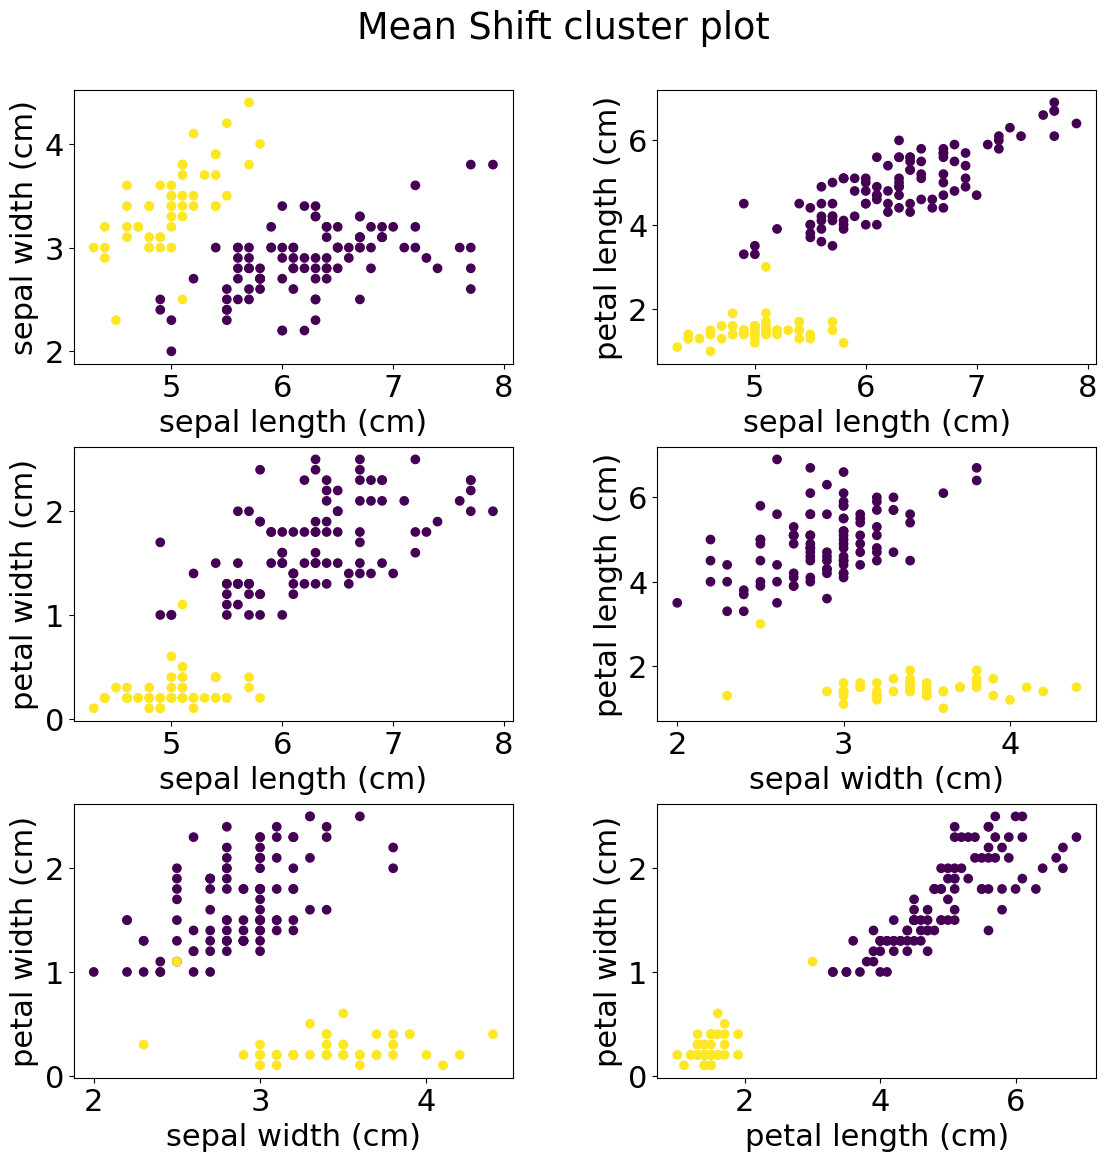

In [354]:
plot_classification(mean_shift_classification, plot_name = "Mean Shift cluster plot")

#### Spectral clustering

In [355]:
from sklearn.cluster import SpectralClustering

spectralClustering = SpectralClustering(n_clusters=3)

spectral_clustering_classification = spectralClustering.fit_predict(data)

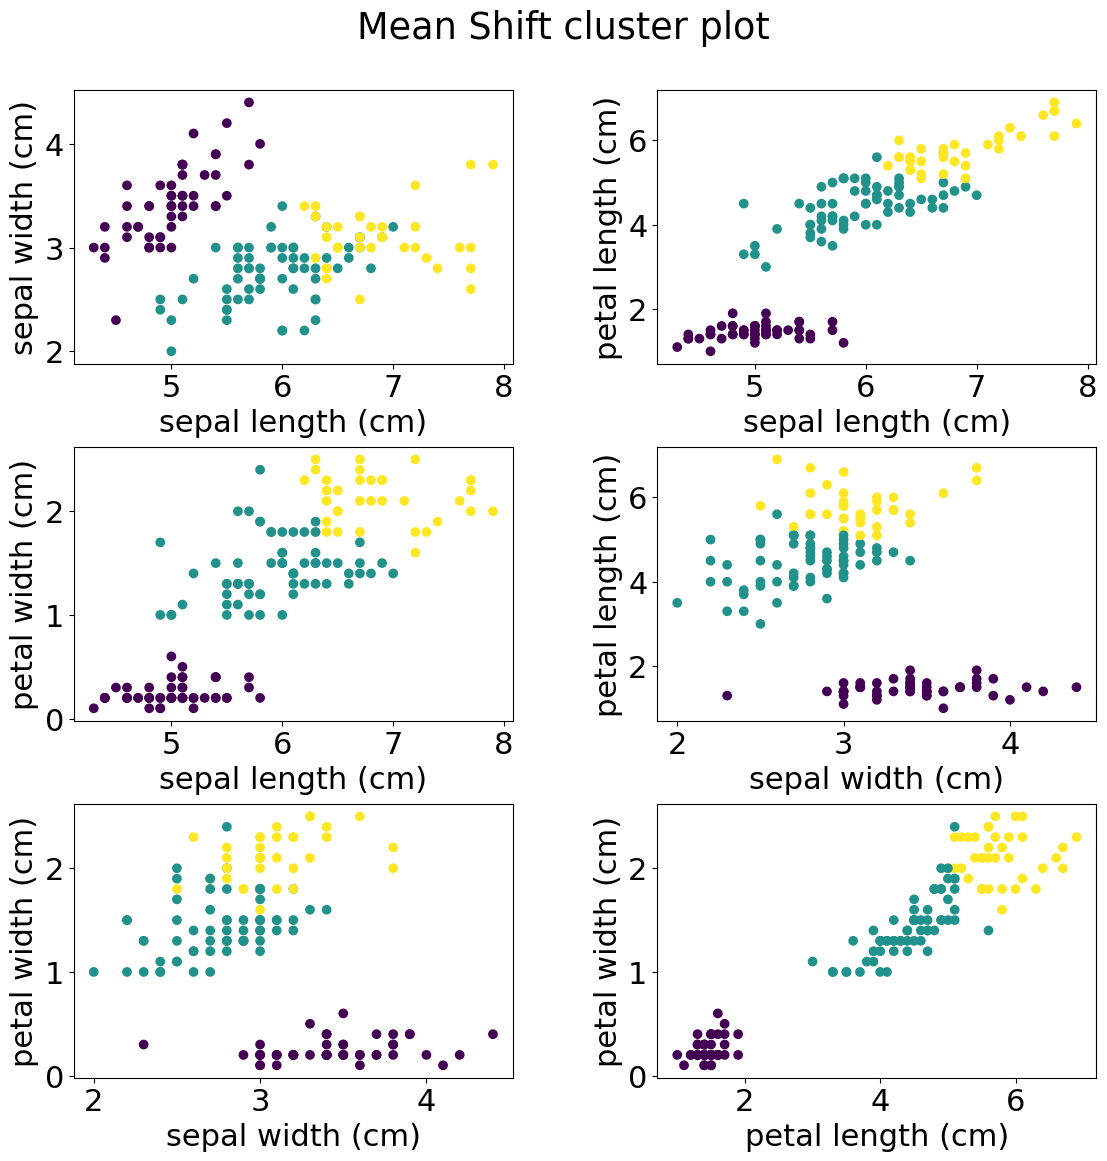

In [356]:
plot_classification(spectral_clustering_classification, plot_name = "Spectral Clustering cluster plot")

#### Agglomerative clustering (type of Hierarchical clustering)

In [357]:
from sklearn.cluster import AgglomerativeClustering

agglomerativeClustering = AgglomerativeClustering(n_clusters=3)

agglomerative_clustering_classification = agglomerativeClustering.fit_predict(data)

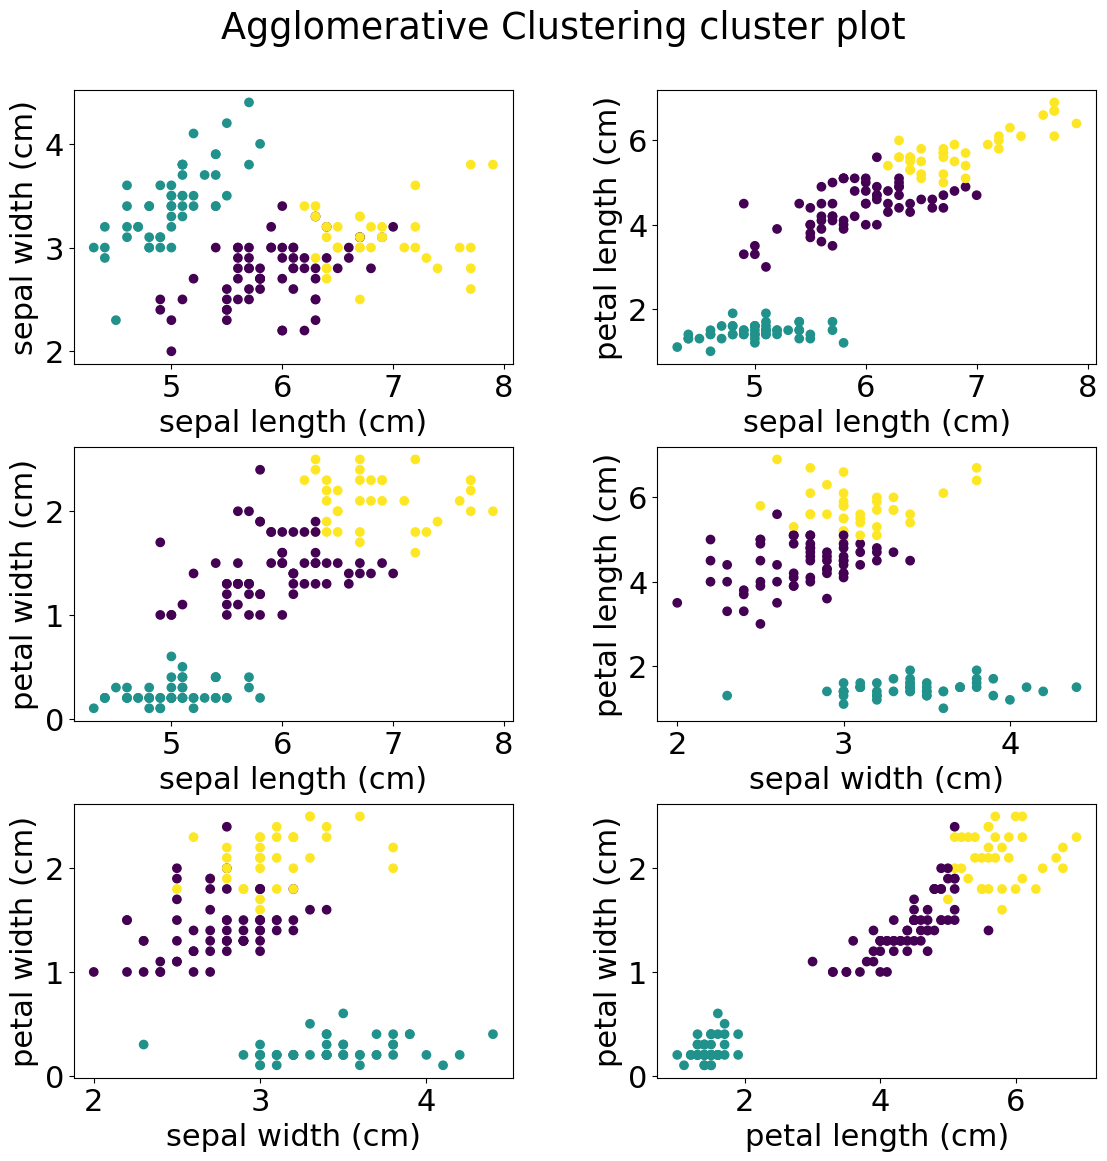

In [358]:
plot_classification(agglomerative_clustering_classification, plot_name = "Agglomerative Clustering cluster plot")

#### DBSCAN
- Iris dataset je vjerojatno premalen da daje dobre rezultate

In [359]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.8, min_samples=4)

dbscan_classification = dbscan.fit_predict(data)

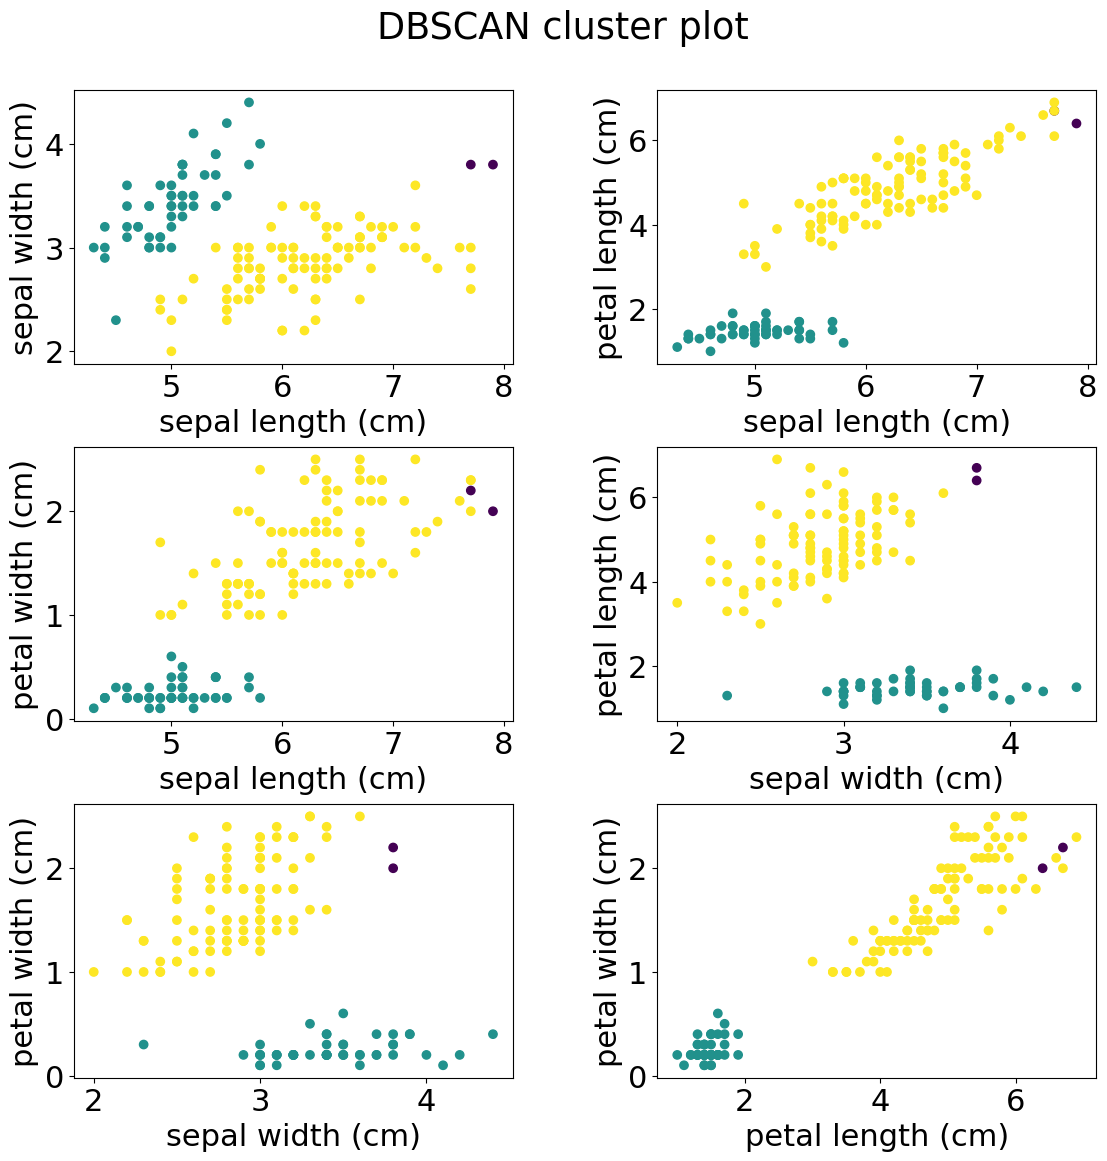

In [360]:
plot_classification(dbscan_classification, plot_name = "DBSCAN cluster plot")

#### OPTICS
- Iris dataset je vjerojatno premalen da daje dobre rezultate

In [361]:
from sklearn.cluster import OPTICS

optics = OPTICS(min_samples=3)

optics_classification = optics.fit_predict(data)

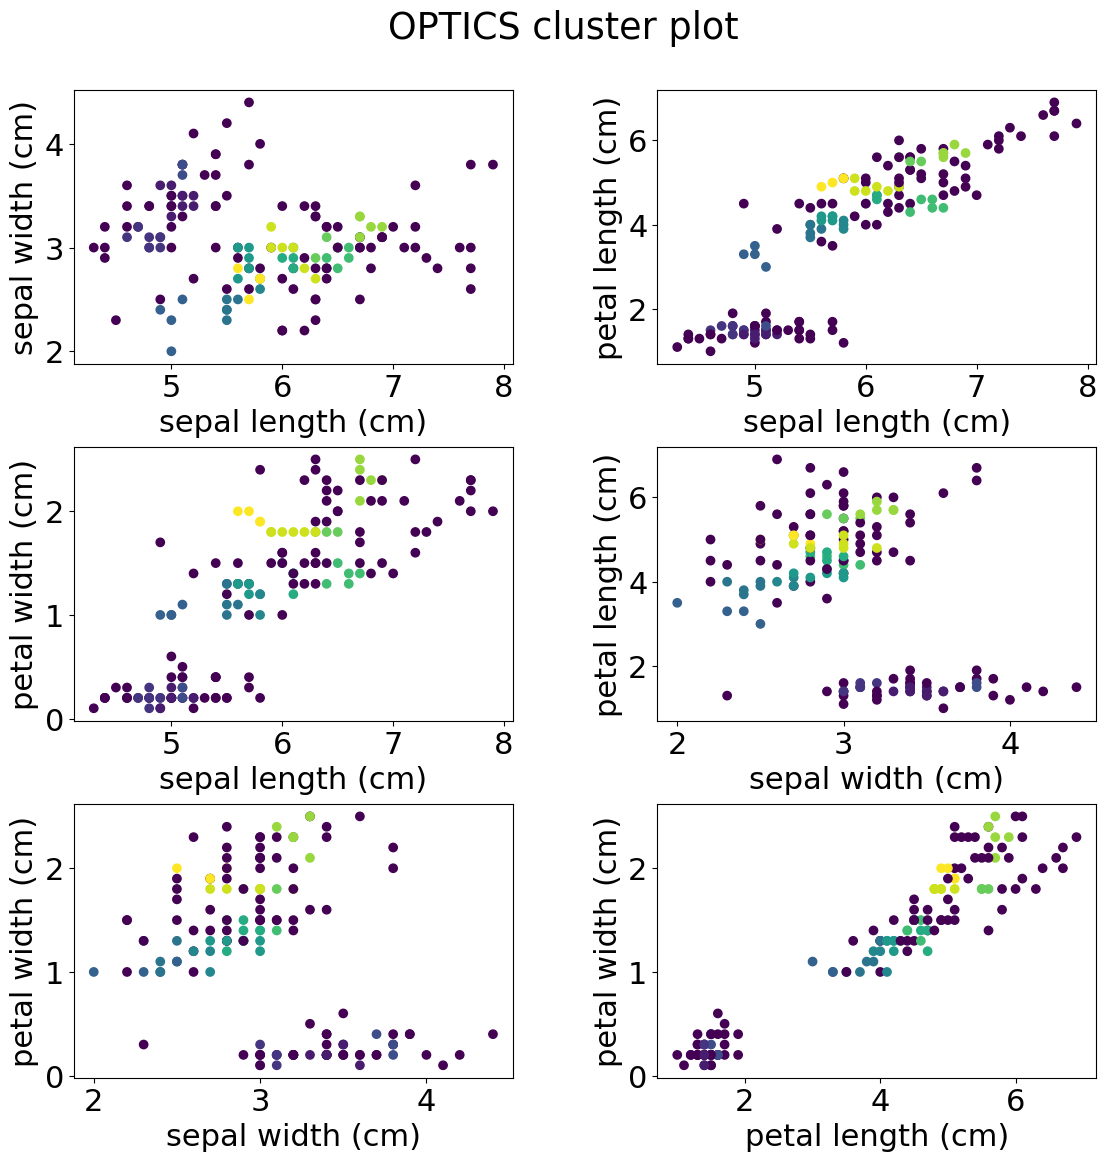

In [362]:
plot_classification(optics_classification, plot_name = "OPTICS cluster plot")

#### BIRCH

In [363]:
from sklearn.cluster import Birch

birch = Birch()

birch_classification = birch.fit_predict(data)

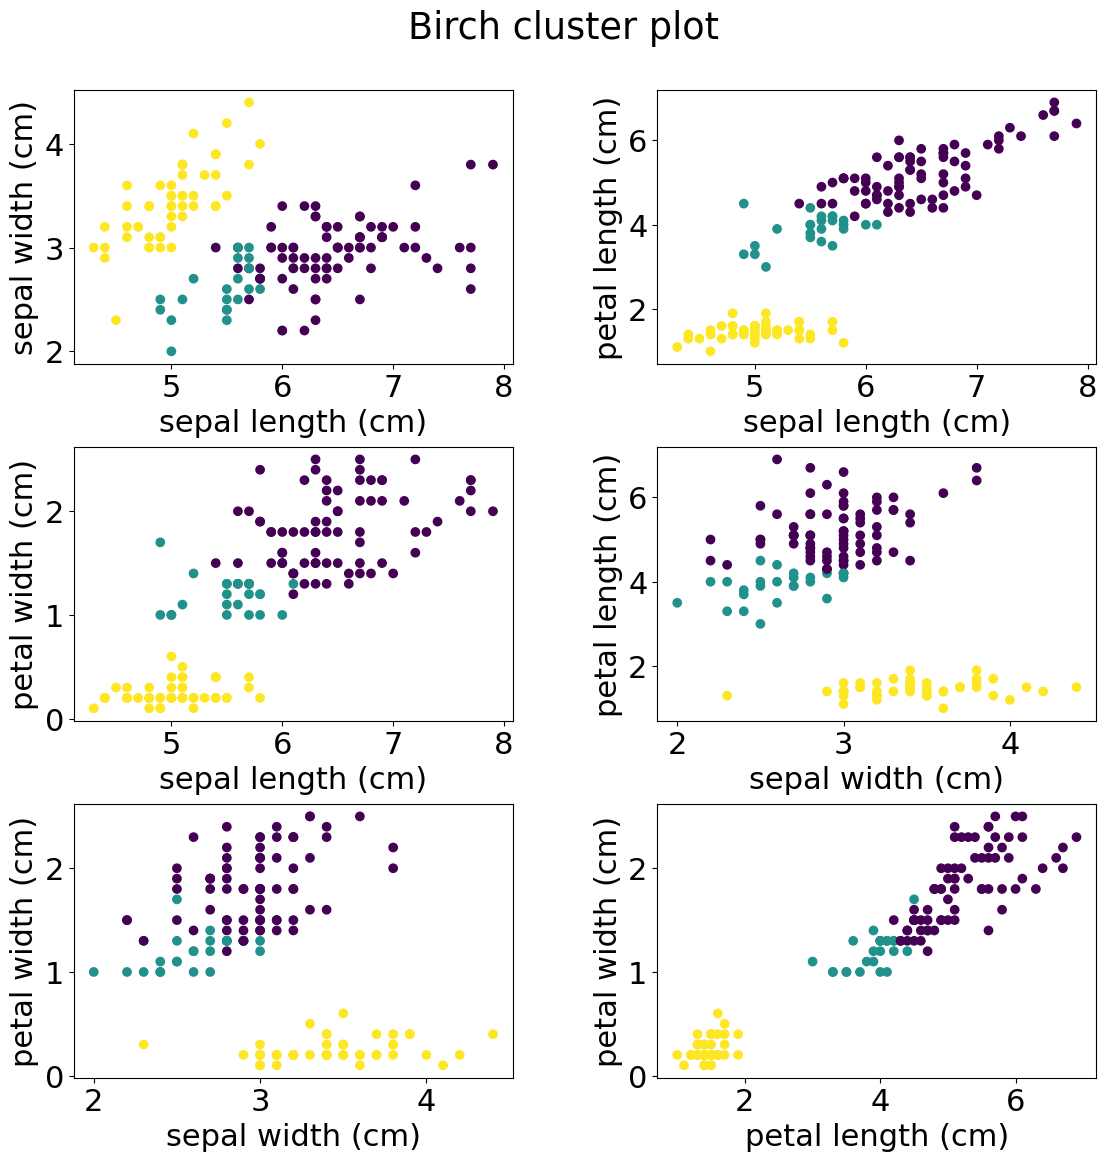

In [364]:
plot_classification(birch_classification, plot_name = "Birch cluster plot")

## Evaluate clusters

In [365]:
from sklearn import metrics

clustering_methods = ["KMeans", "Affinity Propagation",
    "Mean Shift", "Spectral Clustering", "Agglomerative Clustering",
    "DBSCAN", "OPTICS", "BIRCH"]
classification_data = {
    "KMeans": kmeans_classification,
    "Affinity Propagation": affinity_propagation_classification,
    "Mean Shift": mean_shift_classification,
    "Spectral Clustering": spectral_clustering_classification,
    "Agglomerative Clustering": agglomerative_clustering_classification,
    "DBSCAN": dbscan_classification,
    "OPTICS": optics_classification,
    "BIRCH": birch_classification
}

evaluation_names = ["RI", "ARI", "MI", "NMI", "AMI", 
    "Homogeneity", "Completeness", "V-score", "FMI",
    "Silhouette", "CHI", "DBI"]
evaluation = {}
for i in classification_data:
    evaluation[i] = {}

for i in classification_data:
    predicted = classification_data[i]
    expected = true_classification

    # True classification known
    evaluation[i]["RI"] = metrics.rand_score(labels_pred = predicted, labels_true = expected)
    evaluation[i]["ARI"] = metrics.adjusted_rand_score(labels_pred = predicted, labels_true = expected)
    
    evaluation[i]["MI"] = metrics.mutual_info_score(labels_pred = predicted, labels_true = expected)
    evaluation[i]["NMI"] = metrics.normalized_mutual_info_score(labels_pred = predicted, labels_true = expected)
    evaluation[i]["AMI"] = metrics.adjusted_mutual_info_score(labels_pred = predicted, labels_true = expected)

    evaluation[i]["Homogeneity"] = metrics.homogeneity_score(labels_pred = predicted, labels_true = expected)
    evaluation[i]["Completeness"] = metrics.completeness_score(labels_pred = predicted, labels_true = expected)
    evaluation[i]["V-score"] = metrics.v_measure_score(labels_pred = predicted, labels_true = expected)

    evaluation[i]["FMI"] = metrics.fowlkes_mallows_score(labels_pred = predicted, labels_true = expected)

    # True classification unknown
    evaluation[i]["Silhouette"] = metrics.silhouette_score(data, labels=predicted)
    
    evaluation[i]["CHI"] = metrics.calinski_harabasz_score(data, labels=predicted)
    
    evaluation[i]["DBI"] = metrics.davies_bouldin_score(data, labels=predicted)

## Plot evaluation results

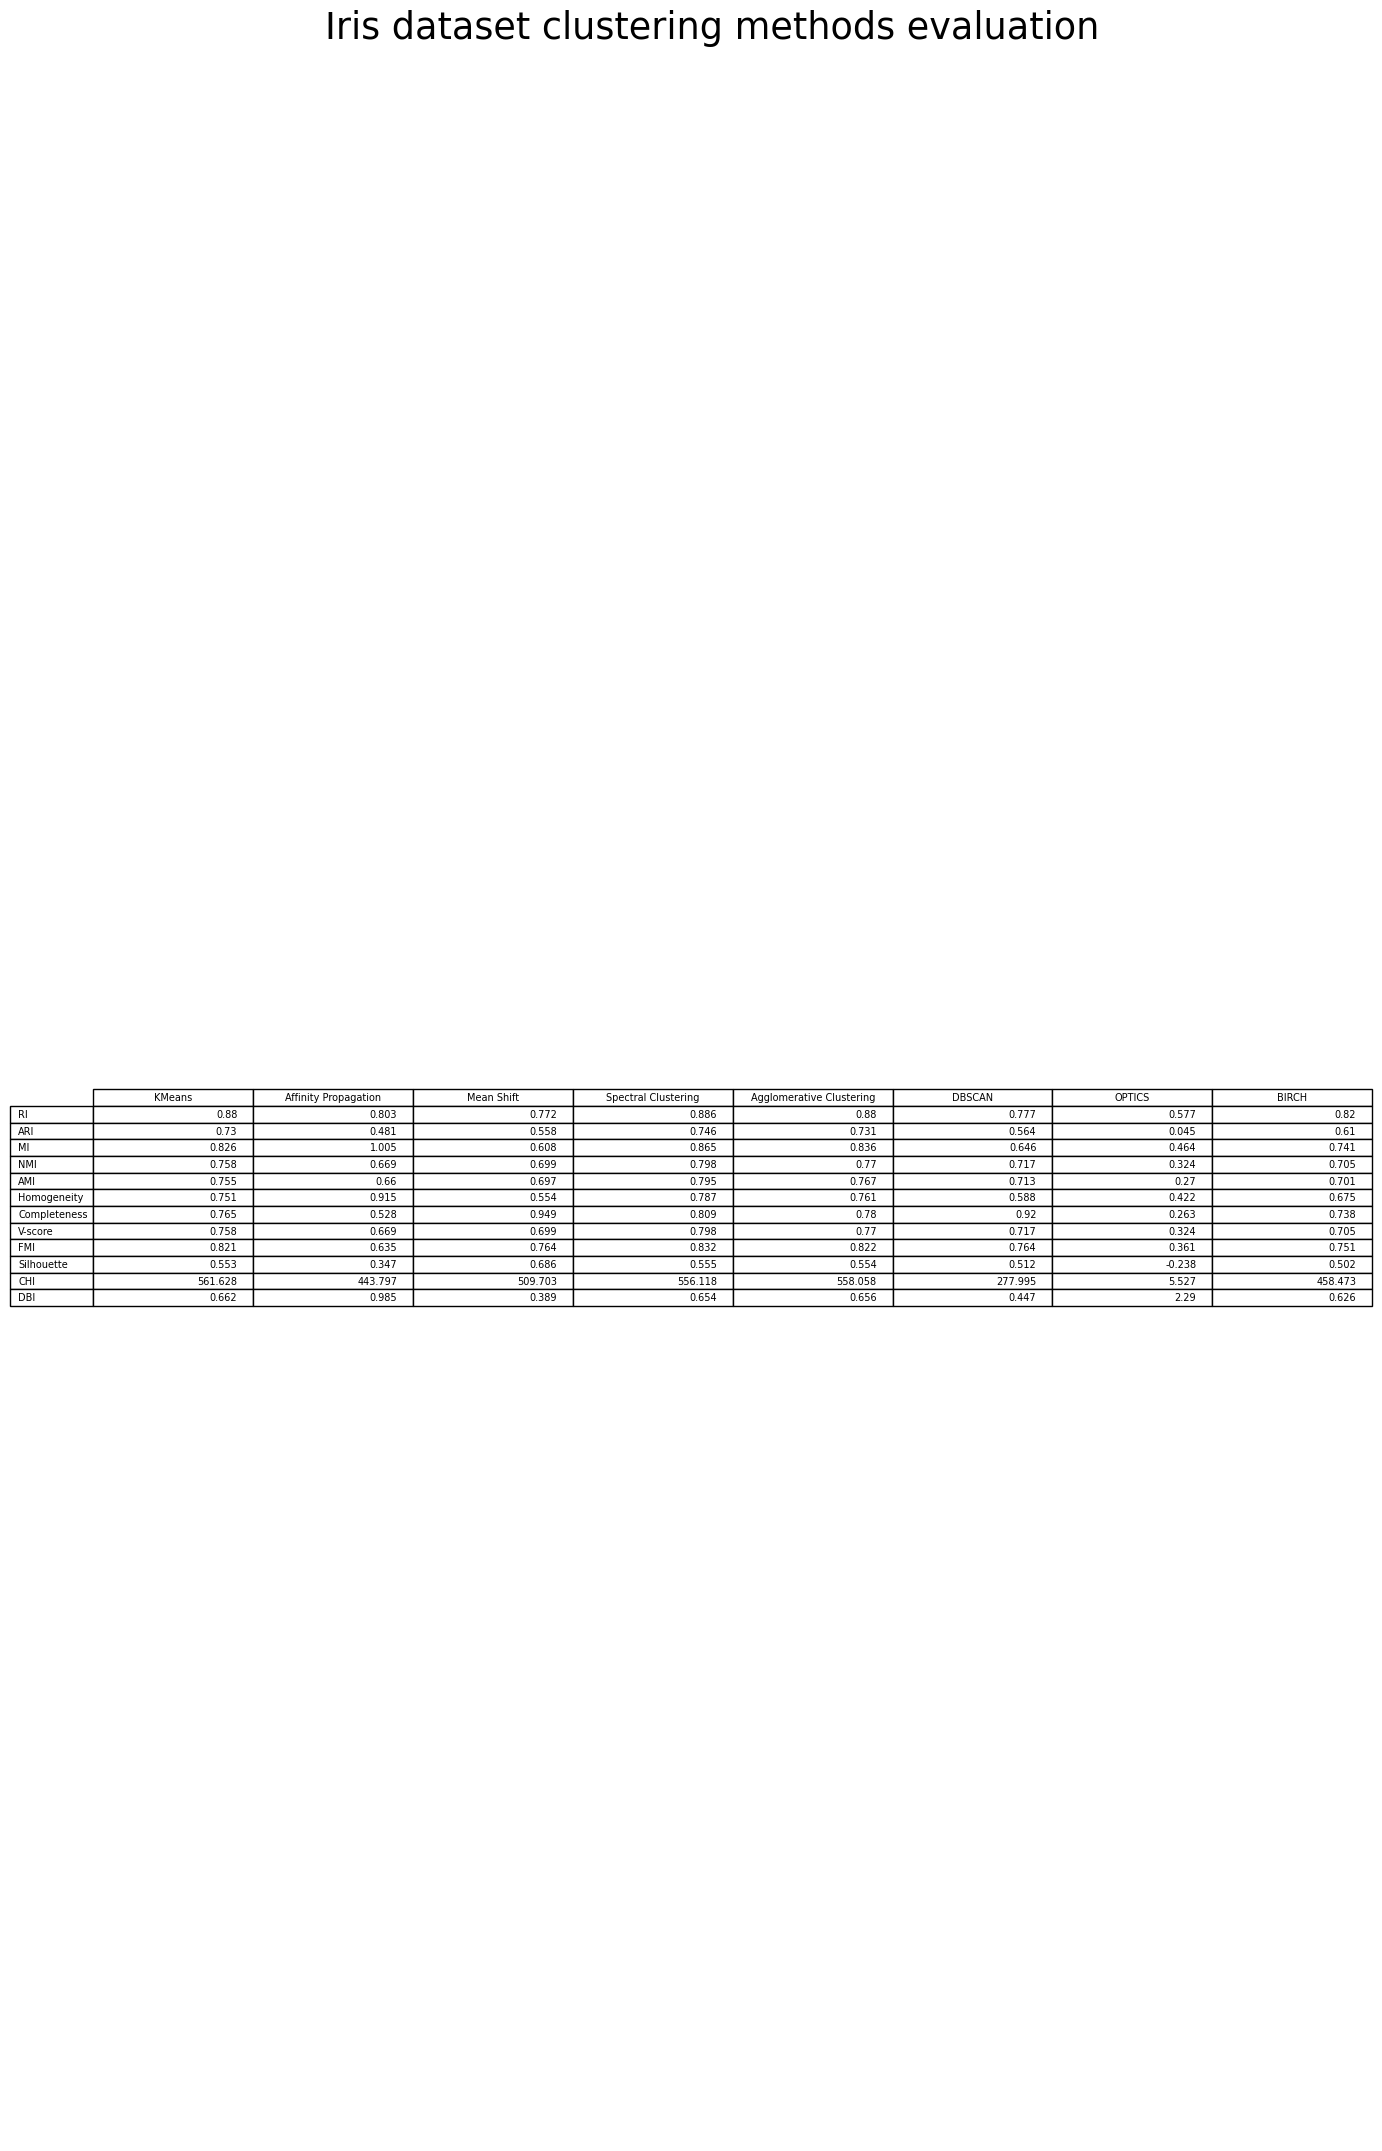

In [366]:
cellText = []
for evaluation_name in evaluation_names:
    row = []
    for clustering_method in clustering_methods:
        row.append(round(evaluation[clustering_method][evaluation_name], 3))
    cellText.append(row)



hcell, wcell = 2, 2 
hpad, wpad = 0.5, 0.5    
fig=plt.figure(figsize=(len(clustering_methods)*wcell+wpad, len(evaluation_names)*hcell+hpad))
ax = fig.add_subplot(111)
ax.axis('off')
the_table = ax.table(cellText,
          colLabels=clustering_methods,
          rowLabels=evaluation_names,
          loc='center')

plt.suptitle("Iris dataset clustering methods evaluation")
plt.show()

- **RI** -> Rand index
- **ARI** -> Adjusted Rand Index
- **NMI** -> Normalized Mutual Information
- **AMI** -> Adjusted Mutual Information
- **Homogeneity** -> Homogeneity score
- **Completeness** -> Completeness score
- **V-score** -> V-measure score
- **FMI** -> Fowlkes-Mallows score
- **Silhouette** -> Silhouette coefficient
- **CHI** -> Calinski-Harabasz Index
- **DBI** -> Davies-Bouldin Index